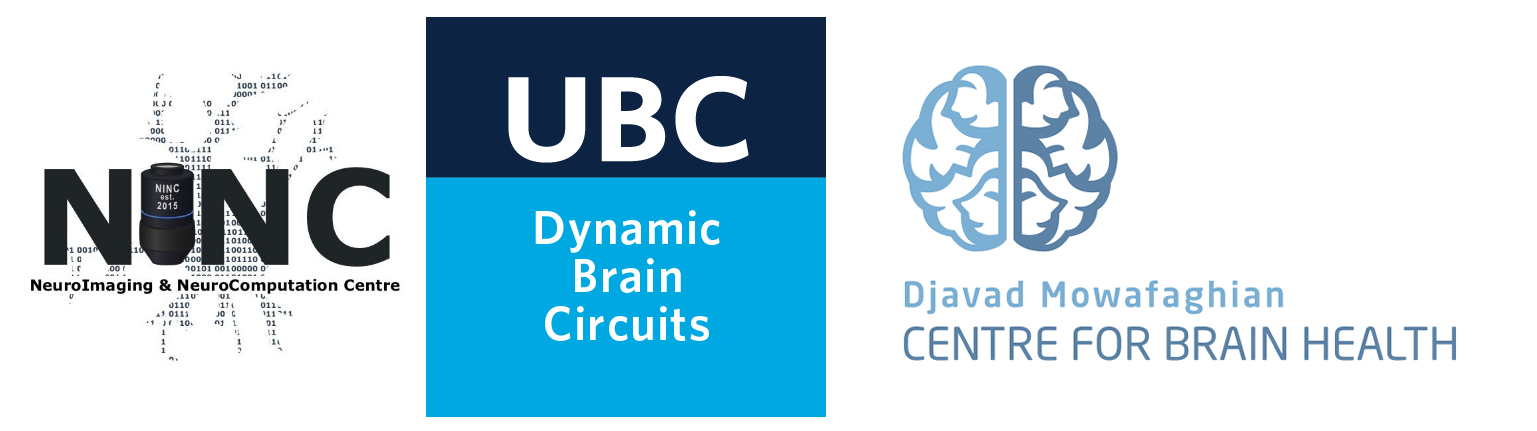

These tutorial notebooks were developed at the Djavad Mowafaghian Centre for Brain Health by the NINC/UBC Brain Circuits team.  If you find the tutorials useful you can acknowledge us with the following statement: 

<em>"This work was supported by resources made available through the Dynamic Brain Circuits cluster and the NeuroImaging and NeuroComputation Core at the UBC Djavad Mowafaghian Centre for Brain Health (RRID:SCR_019086).”</em>

If you use the packages in your research, please cite the originators as per their documentation.

# DeepLabCut Tutorial - Part 1

The directory titled "my_files" is where all of your files for this workshop will go. The "videos" folder within this directory is where you will download some sample videos, and the "working_dir" is where your project files will go. 

If the code block below is showing warnings, check that you have the correct kernel running.

>To view your current kernel or change kernels, go to the top menu bar and click Kernel > Change kernel
In the dropdown menu, you should be selecting ```Python[conda env:DEEPLABCUT]``` or ```Python[conda env:DEEPLABCUT_M1]```, depending on which .yaml file you used.

In [1]:
import deeplabcut
from pathlib import Path #package for managing paths
import glob #package for finding files 

Loading DLC 2.3.9...


We will start by downloading a sample video for the workshop.

- Visit <a href="https://osf.io/g9d76/?view_only=4dee0dec63c74fe8ab4f5b0a48623c43">this OSF page</a> and click on 'cropped video'
- You should find 4 videos in this folder. 
> The steps for DLC will be the same if you work with one video or all four.  To decrease the time needed for downloading and processing we recommend using 00604.avi
- Download the sample video onto your computer
- In your file explorer, extract this zip file and move it into the "videos" folder.

Before running the next block of code, you can edit the variable names.
<ul>
<li> Variables should be encased by <em>single</em> quotes; ie '<em>name_of_variable</em>'</li>
<li>It is good practice to avoid spaces in folder and file names; underscores preferred.</li>
</ul>

In [ ]:
#The following variables will be included in the name of a new project folder created in working_dir. Customize them as needed!

project_name = 'deeplabcut_test' #project name here

working_dir_path = Path(Path.cwd(), "my_files", "working_dir")

experimenter_name = 'my_name' #your name here

video_paths = glob.glob(str(Path(Path.cwd(), "my_files", "videos"))+"/*.avi")
assert len(video_paths) > 0, "Move the demo video files into the 'videos' folder"

print("project_name:",project_name)
print("experimenter_name:",experimenter_name)
print("video_paths:",video_paths)
print("working_dir_path:",working_dir_path)

Now with our project name and experimenter name confirmed, we can create our new project!

In [ ]:
deeplabcut.create_new_project(
    project_name,
    experimenter_name,
    video_paths, 
    working_directory=working_dir_path,
    copy_videos=True)

After running the above code block, you should now notice in your file directory that your working directory has a new folder titled with your project name, your own name, and the date.

In [ ]:
from datetime import datetime 

date_now = datetime.now().strftime("%Y-%m-%d")

config_path = Path(Path.cwd(), "my_files", "working_dir", project_name+"-"+experimenter_name+"-"+date_now, "config.yaml")

assert config_path.is_file(), f"Cannot find the config.yaml file. Please make sure you have run the `deeplabcut.create_new_project` code above has been run and {str(Path(working_dir_path, project_name))} exists."

We'll now edit the config.yaml file, which can be found in the new folder you just created. Open the file within Jupyter Notebook to make your edits.

<ul>
<li>Under ‘body parts’, list the body parts that you want to label, using the following format:<br>
        -head<br>
        -tail</li>
<li>Under 'skeleton,' list how you want the body parts to connect using the following format: <br>
-&nbsp;-head<br>
&nbsp;&nbsp;&nbsp;&nbsp;-tail<br>
<ul>
<li>This means that the head and tail are connected. Note these are not directional</li>
</ul>
</ul>
<li>There is also the number of frames to pick and label. The default is 20, and for the interest of
this workshop we will keep it at 20. When using for larger data sets or for more accurate results, set a higher number of
frames.</li>

Save the changes you've made to this file.


The next code block will prompt you to confirm extraction, simply type 'y' or 'yes' to continue.

In [ ]:
deeplabcut.extract_frames(config_path,'automatic','kmeans',crop=False)

This next block of code will open the DeepLabCut GUI. In the GUI window, go to the upper left corner and click File > Open Folder.
In the file explorer that opens, go to your working directory folder > current project folder > 'labelled data' folder. In this folder you should see a folder for each of the sample videos you downloaded, select one and click 'open.'

This will open a new window prompt asking you to choose your reader; select 'napari DeepLabCut' then click 'ok.'


In [ ]:
deeplabcut.label_frames(config_path)

You now want to label each frame with the location of the body parts you specified previously. In the DeepLabCut GUI, go through each frame and mark where each of the body parts are located. 

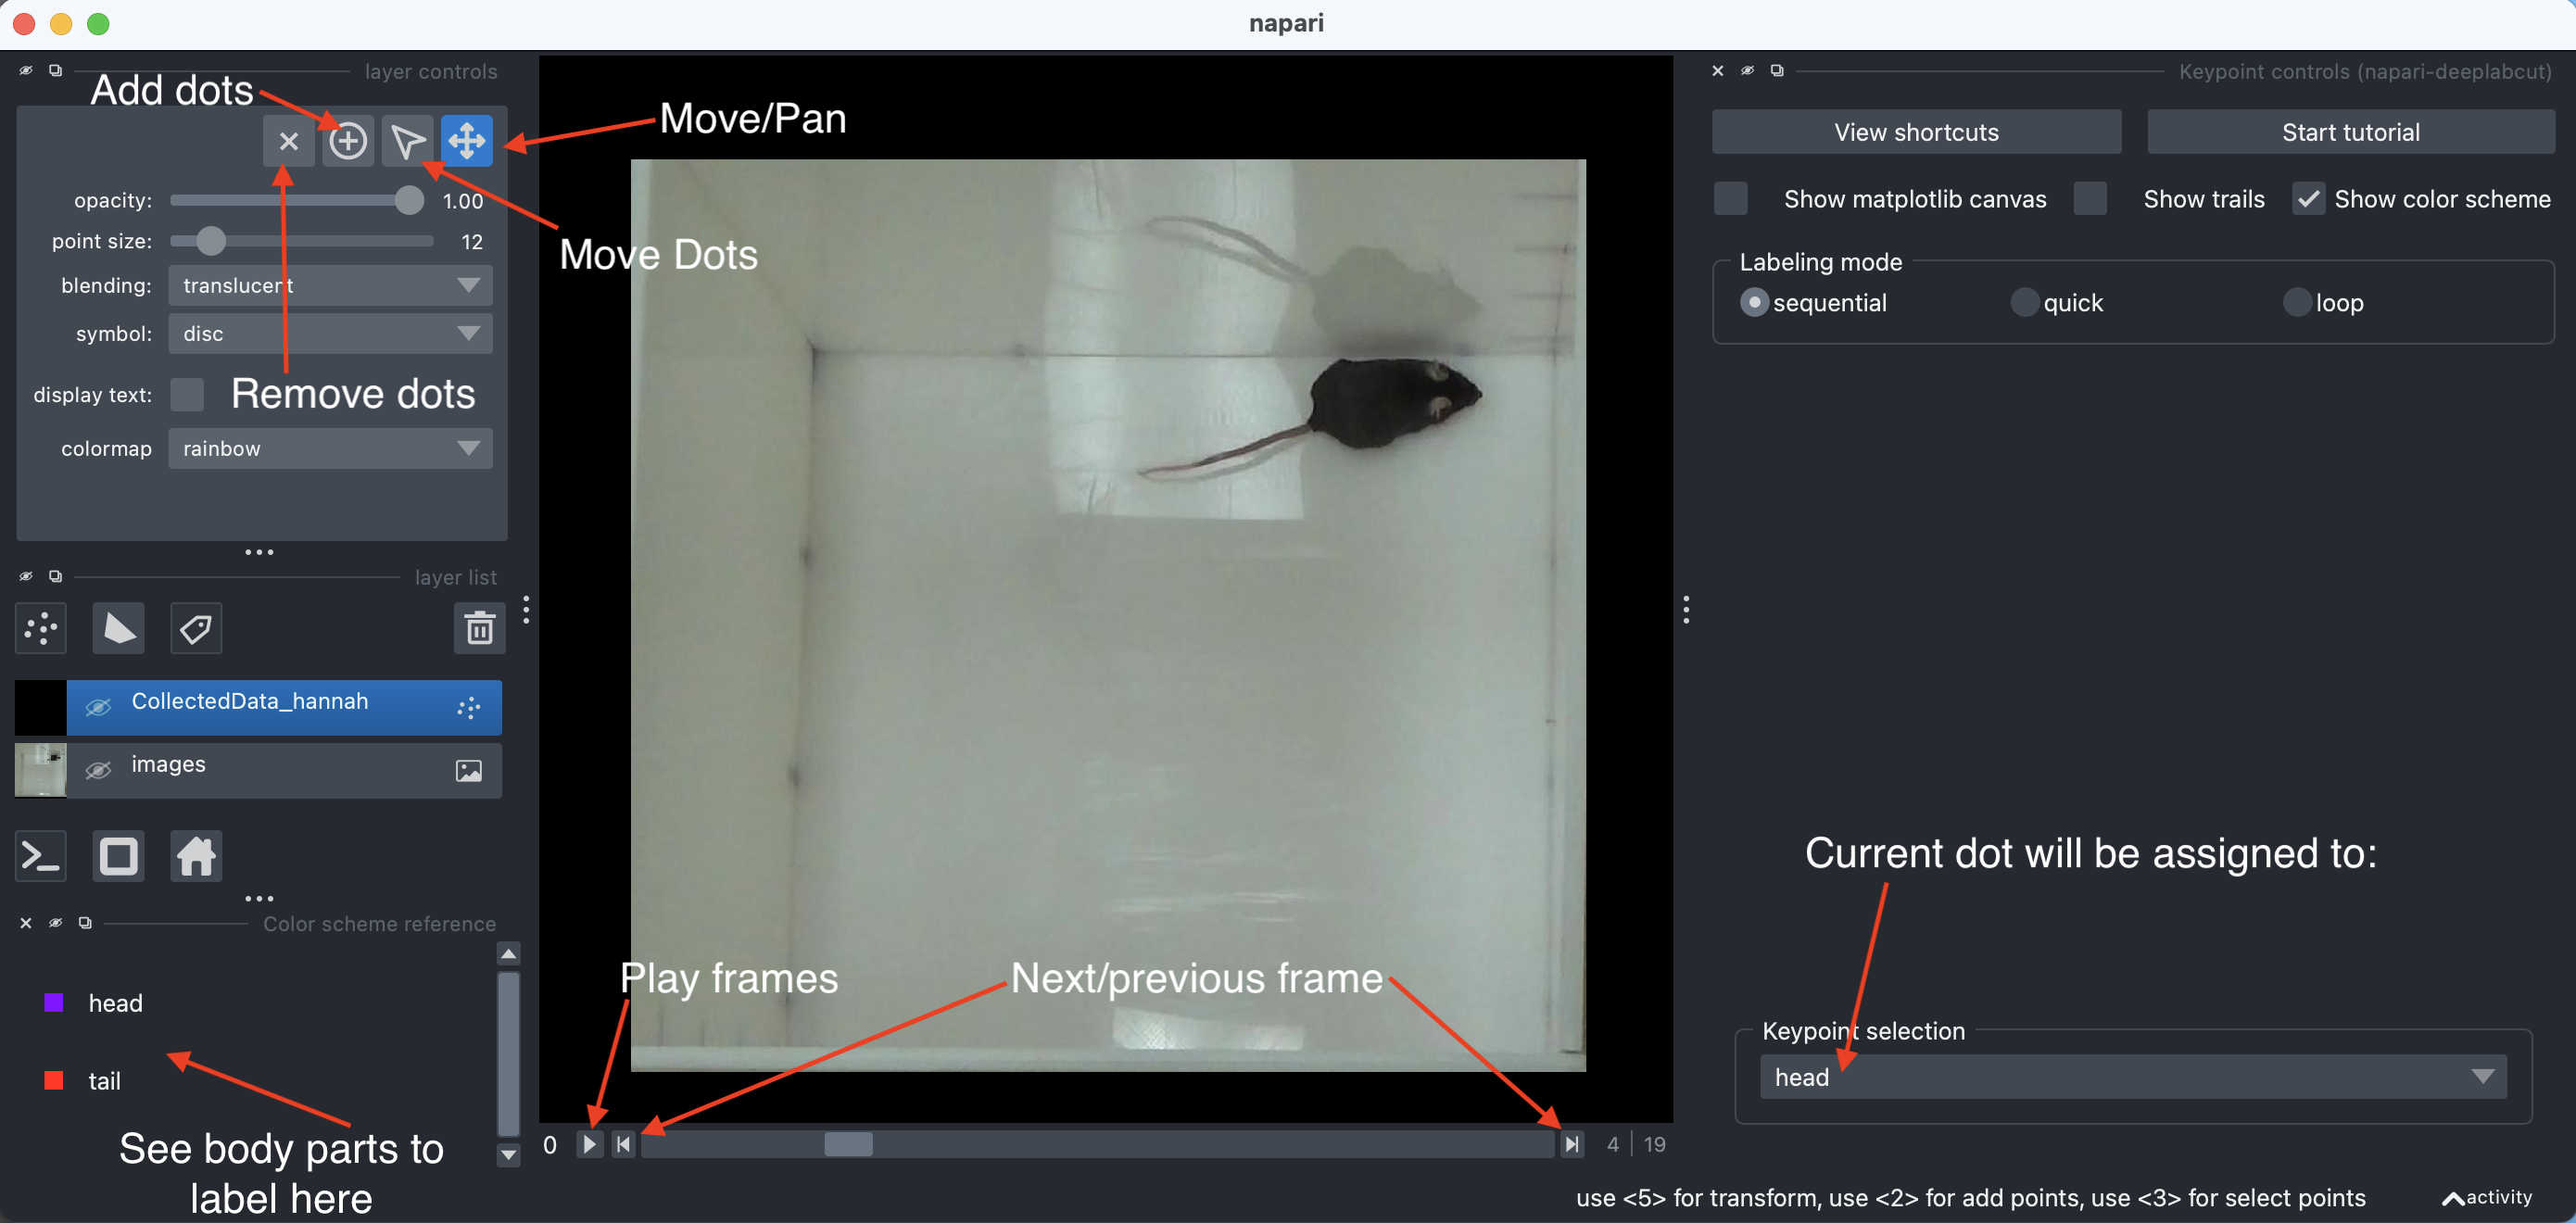

When you are done, press Cmd+s (Mac), Ctrl+S (Windows/Linux), or File > Save Selected Layer(s) to save your changes.

In [ ]:
deeplabcut.create_training_dataset(config_path)

The next block of code will start training the model; the computer will begin to iterate over the training set data we created.
<ul>
    <li>It is suggested to get to iteration 75000</li>
    <li>Save, max and display are optional, if they are not specified, defaults will be chosen</li>
    <li>You may stop this code block whenever, or set the 'maxiters' variable to the desired iteration line</li>
</ul>

This step will take quite a while. In addition, models trained with the above steps are unlikely to be useful due to a small number of training frames and single example video from which the training frames are taken.  In the interest of time, we have provided a better model trained using 3 of the 4 videos and 200 labelled frames.  This was trained overnight for 750k iterations. 
We will proceed with the rest of this workshop with this better trained model. After verifying the next block of code starts as expected, please stop the process and open the other jupyter notebook titled 'dlc-tutorial_part-2.ipynb' to continue.

In [ ]:
deeplabcut.train_network(config_path, saveiters = 2500, maxiters = 10000, displayiters = 100)